# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [1]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
import collections
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 9.0.1**: List three different real networks and state the nodes and links for each of them.

Family: 
 - Nodes: People
 - Links: Bloodrelation
 
Master studens at the Economics Department:
 - Nodes: Students
 - Links: Shared courses

Mail networks:
 - Nodes: People
 - Links: Mails

> **Ex. 9.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

Social networks of all kinds. Nodes are people and links are all sorts of interactions, and they come in all sizes. I see no problem as to why they shouldn't be able to be mapped out.

I care about them because they allow us to understand humans better.

> **Ex. 9.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

Understanding the human brain and human behaviour. Very complex systems of great importance, which network analysis helps us to understand.

> **Ex. 9.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

A network where the nodes are people and links are how often you have been at approximately the same place, perhaps over a set period of time. Most people pass by a lot of different people everyday, but the network would encompass the whole world, and thus the network would still be sparse.

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 9.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

Nodes: [3, 1, 2]
Edges: [(3, 1), (1, 2)]
Nodes after deletion: [1, 2]
Edges after deletion: [(1, 2)]


C:\Users\Malini\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


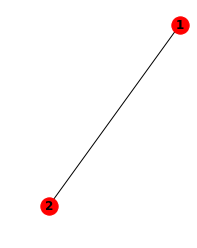

In [3]:
# create graph
G = nx.Graph()

# 1
G.add_node(3)
G.add_edges_from([(1, 2), (1, 3)])

# 2
print(f'Nodes: {G.nodes()}')
print(f'Edges: {G.edges()}')

# 3 
G.remove_node(3)
print(f'Nodes after deletion: {G.nodes()}')
print(f'Edges after deletion: {G.edges()}')

# 4
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

> **Ex. 9.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

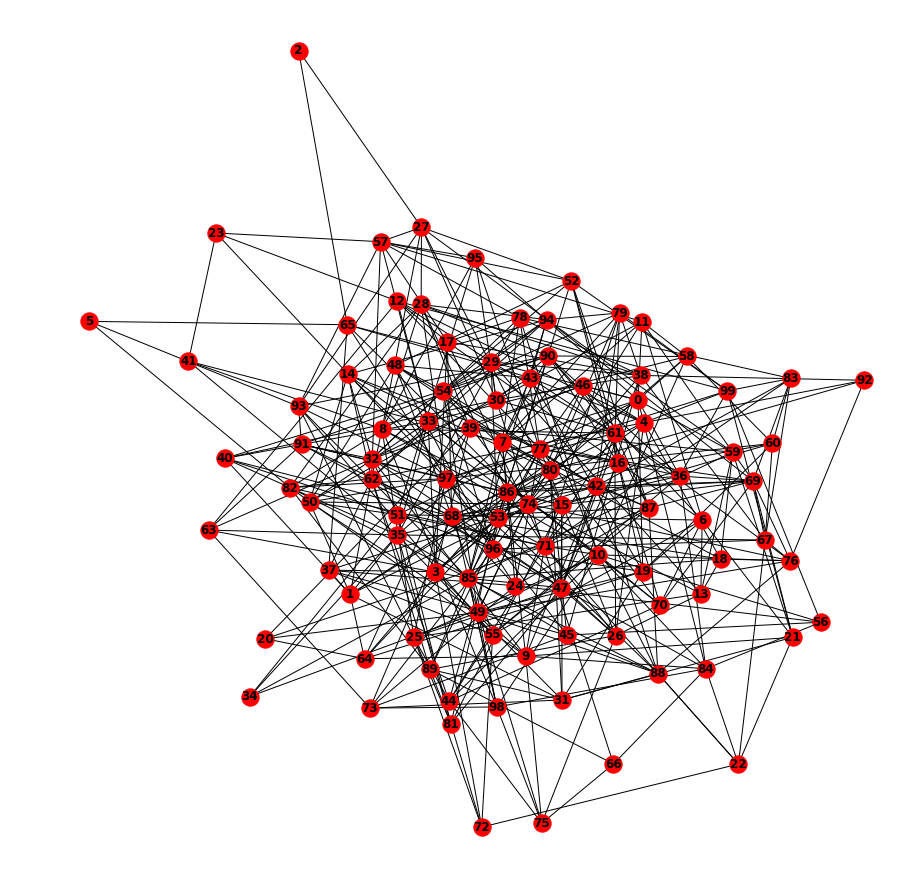

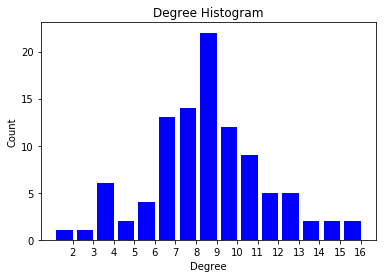

In [4]:
# 1
# An ER network G(n, p) is a network of size n where the possibility of each pair of nodes having a link between eachother is p.

# 2
ER = nx.erdos_renyi_graph(100, 0.1)

# 3
plt.figure(3,figsize=(12,12)) 

nx.draw(ER, with_labels=True, font_weight='bold')

# 4

# I borrow some code from networkx - sharing is caring!

degree_sequence = sorted([d for n, d in ER.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

> **Ex. 9.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

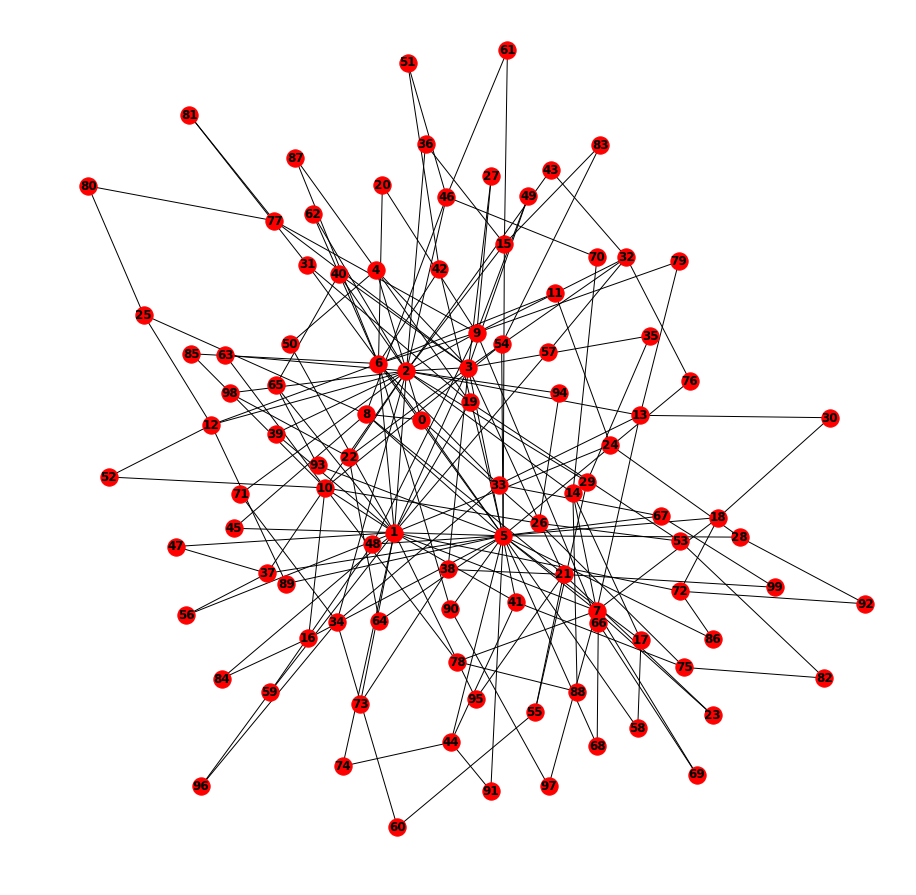

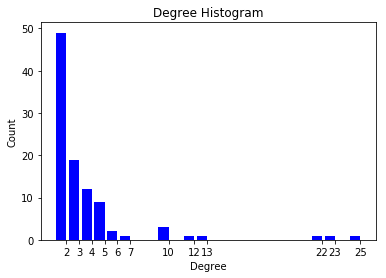

In [5]:
# 1 
# A BA network is a network that starts with m0 connnected nodes. Each new node is then iteratively added (until given max is reached)
# and each new node is connected to each of the other nodes with prop k_i / \sum_j k_j for all j, where k denotes the degree of each node.
# As such, nodes with high degrees are more likely to be connected to new nodes.

# 2
BA = nx.barabasi_albert_graph(100,2)

# 3 
plt.figure(3,figsize=(12,12)) 
nx.draw(BA, with_labels=True, font_weight='bold')

# 4 

degree_sequence = sorted([d for n, d in BA.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

# 5
# The ER graph looks like a hairball with no seemingly central nodes, a lot of links and an almost normally distributed degree distribution
# whereas the BA graph has central nodes, not so many links and a heavytailed degree distribution

# 6 
# short loop density, centrality measures, testing against null models, diameter etc.

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [6]:
data = pd.read_csv(
    "facebook-wall.txt.anon",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [7]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 9.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [8]:
def slicer(t0, t1):
    
    assert t0 >= t1
    
    t0_used = data.timestamp.max() - t0  # Lower bound of time-slice (here: 7 days before last wall post)
    t1_used = data.timestamp.max() - t1             # Upper bound of time-slice

    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0_used, t1_used)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    
    return G_t

In [ ]:
G = slicer(86400*365,0)

In [ ]:
print(f'Nodes: {G.number_of_nodes()}\nEdges: {G.number_of_edges()}')

Nodes: 44397
Edges: 201632


> **Ex: 9.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

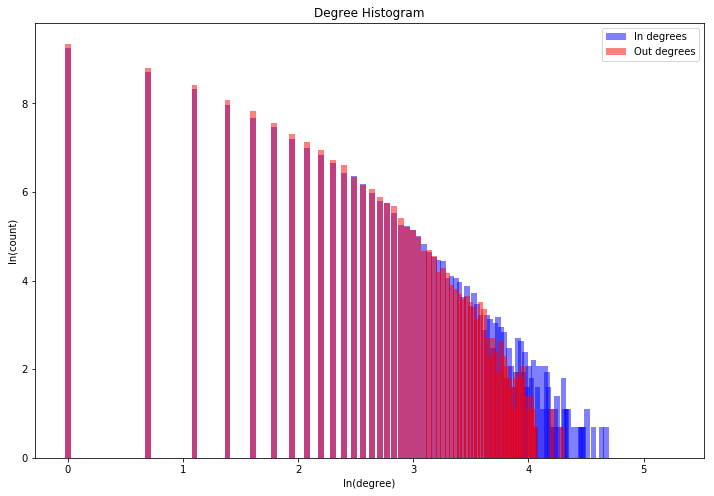

In [ ]:
import math

in_degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
in_degreeCount = collections.Counter(in_degree_sequence)
in_deg, in_cnt = zip(*in_degreeCount.items())

if in_deg[-1] == 0:
    in_deg = in_deg[:-1]
    in_cnt = in_cnt[:-1]
    
out_degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
out_degreeCount = collections.Counter(out_degree_sequence)
out_deg, out_cnt = zip(*out_degreeCount.items())

if out_deg[-1] == 0:
    out_deg = out_deg[:-1]
    out_cnt = out_cnt[:-1]

ln_out_deg = [math.log(i) for i in out_deg]
ln_in_deg = [math.log(i) for i in in_deg]
ln_out_cnt = [math.log(i) for i in out_cnt]
ln_in_cnt = [math.log(i) for i in in_cnt]

    
fig, ax = plt.subplots(figsize=(12,8))
plt.bar(ln_in_deg, ln_in_cnt, width=0.05, color='b', alpha=0.5,label='In degrees')

plt.bar(ln_out_deg, ln_out_cnt, width=0.05, color='r', alpha=0.5,label='Out degrees')

plt.title("Degree Histogram")
plt.ylabel("ln(count)")
plt.xlabel("ln(degree)")
plt.legend()

plt.show()

# Looks like a BA graph!

> **Ex: 9.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

In [ ]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 44397
Number of edges: 201632
Average in degree:   4.5416
Average out degree:   4.5416


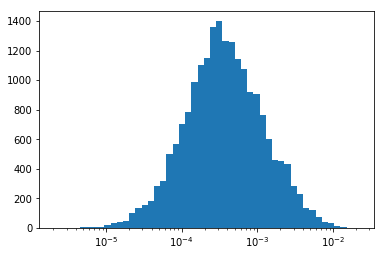

In [ ]:
# calculate clustering coeffs
cluster = nx.clustering(G,weight='weight')

# extract nonzero coeffs
coeffs = [cluster[i] for i in cluster.keys() if cluster[i] != 0 ]

import numpy as np

# plot hist that is logarithmic
plt.hist(coeffs, bins=np.logspace(np.log10(min(coeffs)), np.log10(max(coeffs)), 50))
plt.xscale('log')
plt.show()

# somewhat log normal distribution

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 9.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [ ]:
# I add nodes and edges until the specified threshold is reached

tG = nx.DiGraph()

for i in list(G.nodes()):
    
    # if not in threshold graph, add
    
    if i not in tG and tG.number_of_nodes() < 5000:
        tG.add_node(i)
        
    # if connected, add connection to threshold graph
        
    if len(list(dict(G[i]))) != 0:
        
        j = list(dict(G[i]))[0]
                 
        if j not in tG and tG.number_of_nodes() < 5000:
            tG.add_node(j)
      
        # if edge already in treshold graph, update weight
        if tG.has_edge(i,j):
            tG[i][j]['weight'] = tG[i][j]['weight'] + G[i][j]['weight']
                
        # else add edge
        
        elif tG.number_of_edges() < 20000 and i in tG and j in tG:
            tG.add_edge(i,j,weight = G[i][j]['weight'])
            
    if tG.number_of_edges() >= 20000 and tG.number_of_nodes() >= 5000:
        break

In [ ]:
print(nx.info(tG))
# not the right amount of edges, not sure what went wrong - probably not enough connections between the 5000 selected nodes
# I have spent enough time on this, and I will see the solutions when they arrive instead.

Name: 
Type: DiGraph
Number of nodes: 5000
Number of edges: 4256
Average in degree:   0.8512
Average out degree:   0.8512


In [ ]:
from netwulf import visualize

visualize(tG)

I see a lot of nodes that are not very connected. Perhaps my tresholding should've been done differently

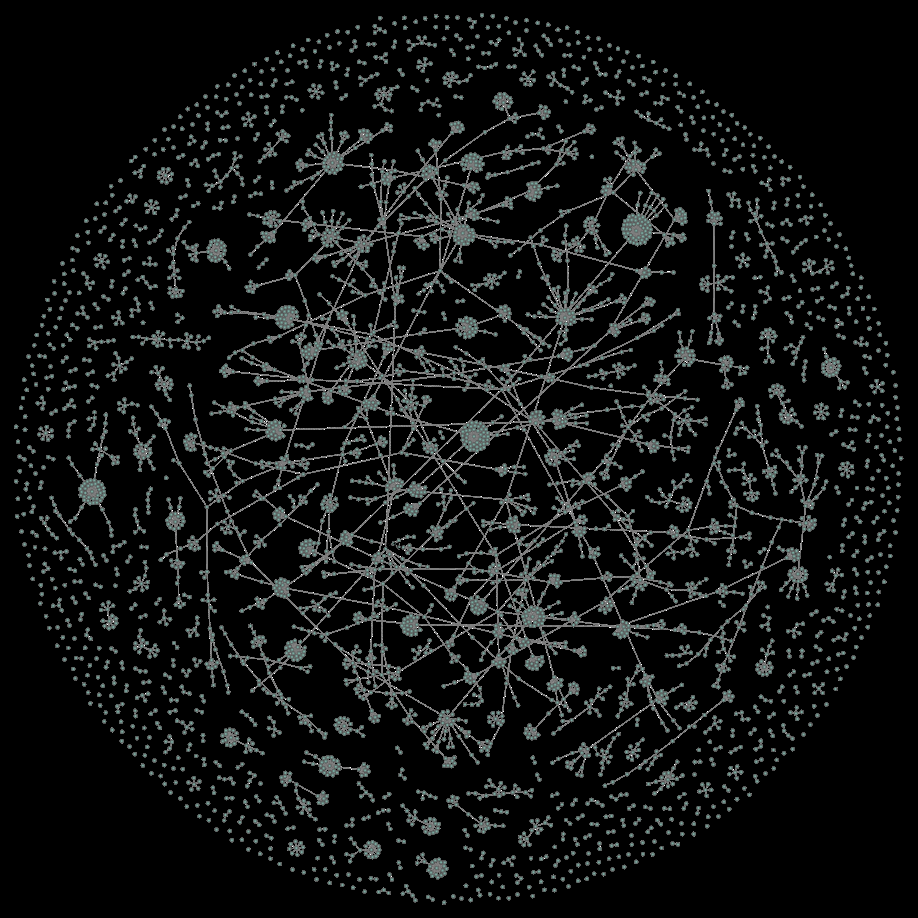